In [2]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 32: Likelihood Ratio Tests

Last time, we introduced Likelihood Ratio tests. Recall that the point of a likelihood ratio test is to compare the likelihood function under a hypothesized value of the parameter with the liklihood function at its maximum. Instead of looking at the ratio $\Lambda$ itself, we often consider $-2\log \Lambda$ instead, since it has a handy distribution. 

### Example 1: Exponential Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the exponential distribution with unknown parameter $\lambda$. Recall that the maximum likelihood estimate of $\lambda$ is $1\over\bar{X}$. We collect a random sample of size 20 and want to test the hypothesis $H_0: \lambda = 3$ vs $H_1: \lambda \neq 3$. Using the data in the python box below, conduct a likelihood ratio test on this hypothesis.  

In [75]:
my_data=np.array([0.18,0.277,0.105,0.126,0.225,0.026,0.123,0.423,0.006,0.281,0.050,0.692,0.105,0.275,0.346,0.079,0.045,0.222,0.063,0.281])

In [76]:
# the maximum likelihood
lam_ML = 1/np.mean(my_data)
print('The maximum likelihood esitimator gives',lam_ML)
#LR = -2*np.log(3/lam_ML)
#print('The likelihood ratio -2log(Lam)=',LR)

The maximum likelihood esitimator gives 5.089058524173028


Remember that the likelihood function for the exponential distribution is
$$
L(\theta\mid \textbf{x}) = \prod_{i=1}^n f(x_i;\theta) = \prod_{i=1}^n \lambda e^{-\lambda x_i} = \lambda^n e^{-\lambda \sum x_i}
$$
We will use this to calculate $-2\log \Lambda$

In [77]:
def L_exp(lam,x):
    return lam**np.size(x)*np.e**(-lam*np.sum(x))
    
# Likelihood for lambda = 3
L_H0 = L_exp(3,my_data)
print('L_H0 = ',L_H0)
# Likelihood for lambda_ML
L_ML = L_exp(lam_ML,my_data)
print('L_ML = ',L_ML)
LR = -2*np.log(L_H0/L_ML)
print('-2log(Lambda) =',LR)

L_H0 =  26429.755940265637
L_ML =  279807.4462046449
-2log(Lambda) = 4.7192223601884615


In [83]:
# this is a two sided test so we consider values more extreme in either direction
stats.chi2.sf(LR,1)

0.029827229194775106

About 3% of the time you will get a more extreme value than this, which means we will reject the null hypothesis.

#### Power

Suppose that the true value of $\lambda$ is 5. Let's determine the power of this test. Let $n=20$. Then determine the power if $n=50$. Remember, power is the probability of correctly rejecting the null hypothesis. 

First, find what value of $-2 \log \Lambda$ would lead you to reject $H_0$. This is sometimes called the critical value. 

In [89]:
CV_exp = stats.chi2.isf(.05,1)
CV_exp

3.8414588206941285

In [91]:
# alternately...
stats.chi2.ppf(0.95,1)

3.841458820694124

Next, obtain the power. Obtain a sample of size 20 from the true population and obtain the value of $-2\log \Lambda$ for this sample. Repeat many times and determine how often you reject the null hypothesis. 

In [96]:
n=20

trials = 5000
tests = [];
for _ in np.arange(trials):
    samp = stats.expon.rvs(scale=1/5,size=n)
    # the maximum likelihood
    lam_ML = 1/np.mean(samp)
    # Likelihood for lambda = 3
    L_H0 = L_exp(3,samp)
    # Likelihood for lambda_ML
    L_ML = L_exp(lam_ML,samp)
    LR = -2*np.log(L_H0/L_ML)
    # this is a two sided test so we consider values more extreme in either direction
    tests = np.append(tests,LR)

In [97]:
np.sum(tests>=CV_exp)/trials

0.609

We will only reject this about 60% of the time.

Repeat for a sample size of 50. What do you expect to happen to power? 

In [107]:
n=50

trials = 5000
tests = [];
for _ in np.arange(trials):
    samp = stats.expon.rvs(scale=1/5,size=n)
    # the maximum likelihood
    lam_ML = 1/np.mean(samp)
    # Likelihood for lambda = 3
    L_H0 = L_exp(3,samp)
    # Likelihood for lambda_ML
    L_ML = L_exp(lam_ML,samp)
    LR = -2*np.log(L_H0/L_ML)
    # this is a two sided test so we consider values more extreme in either direction
    tests = np.append(tests,LR)

In [108]:
np.sum(tests>=CV_exp)/trials

0.955

Now it has increased to 95%.

### A Different Test

We've explored hypothesis tests in this class before. Taking advantage of our computing power, we don't have to rely on test statistics with asymptotic distributions. Let's conduct a more direct hypothesis test using simulation. Recall:

$$
H_0: \lambda = 3
$$

$$
H_1: \lambda \neq 3
$$

Pick a different test statistic. Obtain an empirical distribution of that test statistic under $H_0$. Next, find the $p$-value by determining how often this test statistic is at or further away from the test statistic derived from the sample. Remember that this is a two-sided test. 

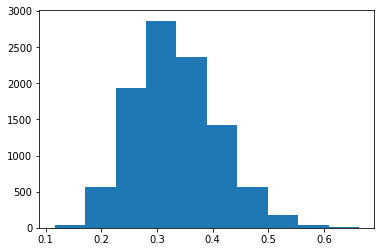

0.9812

In [149]:
# under the null hypothesis lambda is 3.  We will use sample mean as our test statistic
trials = 10000
ts = []
for _ in np.arange(trials):
    samp = stats.expon.rvs(scale=1/3,size=20)
    this_ts = np.mean(samp)
    ts = np.append(ts,this_ts)

plt.hist(ts)
plt.show()

np.mean(ts>=np.mean(my_data))
    

How did the $p$-value compare to the LRT $p$-value? I wonder how the power of this test compares to our LRT. 

#### Power

Let's figure out the power of this test. First, determine for what values of the test statistic would lead us to reject $H_0$. These values can be referred to as your rejection region. 

In [150]:
# this is a two-sided test
req_reject_p_hi = percentile(97.5,ts)
req_reject_p_lo = percentile(2.5,ts)

Now, determine the power of this test. Like in the LRT case, obtain a sample of size 20 and obtain the test statistic. Repeat many times and see how often your test statistic is in your rejection region. 

In [151]:
trials = 10000
ts = []
for _ in np.arange(trials):
    samp = stats.expon.rvs(scale=1/5,size=20)
    this_ts = np.mean(samp)
    ts = np.append(ts,this_ts)
    
np.mean(ts>=req_reject_p_hi) + np.mean(ts<=req_reject_p_lo)

0.569

Repeat for a sample size of 50. Note that you will have to obtain new critical values in order to do this.  

In [152]:
trials = 10000
ts = []
for _ in np.arange(trials):
    samp = stats.expon.rvs(scale=1/3,size=50)
    this_ts = np.mean(samp)
    ts = np.append(ts,this_ts)

req_reject_p_hi = percentile(97.5,ts)
req_reject_p_lo = percentile(2.5,ts)

ts = []
for _ in np.arange(trials):
    samp = stats.expon.rvs(scale=1/5,size=50)
    this_ts = np.mean(samp)
    ts = np.append(ts,this_ts)
    
np.mean(ts>=req_reject_p_hi)+ np.mean(ts<=req_reject_p_lo)

0.9391